Para completar: 


# D-Regular Trees


In [2]:
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
import operator

In [14]:
##https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3

def hierarchy_pos(G, root, width=15., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, 
                  pos = None, parent = None):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
       pos: a dict saying where all nodes go if they have been assigned
       parent: parent of this branch.'''
    if pos == None:
        pos = {root:(xcenter,vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    neighbors = G.neighbors(root)
    if parent != None:   #this should be removed for directed graphs.
        neighbors.remove(parent)  #if directed, then parent not in neighbors.
    if len(neighbors)!=0:
        dx = width/len(neighbors) 
        nextx = xcenter - width/2 - dx/2
        for neighbor in neighbors:
            nextx += dx
            pos = hierarchy_pos(G,neighbor, width = dx, vert_gap = vert_gap, 
                                vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, 
                                parent = root)
    return pos

In [30]:
G=nx.balanced_tree(2,2)
G.remove_node(6)
G.edges()

[(0, 1), (0, 2), (1, 3), (1, 4), (2, 5)]

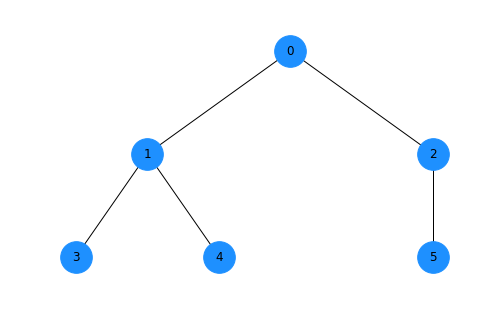

In [38]:
pos = hierarchy_pos(G,0) 
nx.draw(G,pos,with_labels=True,node_size=1000,node_color='dodgerblue')

plt.show()

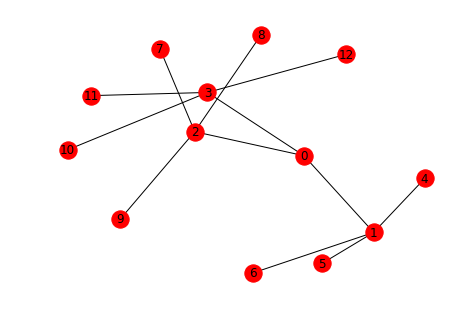

In [16]:
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
plt.show()